In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
df_cate = pd.read_csv('../../New_csv(데이터전처리 완료된 csv)/희귀질환정보_항목분류.csv')
df_insurance = pd.read_csv('../../New_csv(데이터전처리 완료된 csv)/심평원_희귀질환_건강보험_진료_통계_2021.csv')

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## 심평원 희귀질환 건강보험 진료 통계 2021 계통 별로 보기

### 계통 별 분류(항목분류)

In [3]:
def codes(x):
    try :
        condition = (df_cate["질환코드"] == x[0]) &\
               (float(x[1:]) >= df_cate["코드시작"].astype(float)) &\
               (float(x[1:]) <= df_cate["코드끝"].astype(float))
        result = df_cate.loc[condition, '항목분류']
        if len(result) > 0:
            return result.iloc[0]
        else:
            return None  # 여기서 None 대신 원하는 기본값을 사용하십시오.
    except:
        return None



In [4]:
df_insurance['항목분류'] = df_insurance['희귀질환 상병코드'].apply(codes)

In [5]:
df_insurance.columns

Index(['희귀질환 상병코드', '환자수', '명세서 청구건수', '입내원일수', '보험자부담금', '요양급여비용총액', '항목분류'], dtype='object')

#### 총 계로 보기

In [8]:
# 항목 분류 별로 묶기
pivot_insurance = df_insurance.pivot_table(
    values=['환자수', '명세서 청구건수', '입내원일수', '보험자부담금', '요양급여비용총액'], 
    index='항목분류', 
    aggfunc='sum'
)


In [9]:
pivot_insurance.sort_values('환자수', ascending=False)

,명세서 청구건수,보험자부담금,요양급여비용총액,입내원일수,환자수
항목분류,,,,,
신생물,459835,59888499060,95588778310,497843,273917
신경계통질환,762588,220744665780,255526327490,1393166,142993
눈및부속기관,192952,10398273820,14883650760,194976,101700
근육골격계통,566014,87179644580,100229734110,674582,94968
선천기형변형,369594,136573716570,149584267310,468065,82058
순환기계통,296465,123753114190,139221920690,546976,63331
소화기계통,286848,151025423970,174588860350,416159,57286
혈액조혈기관,239344,296682736040,333423674710,318812,53312
"내분비,영양",286943,153088444240,185001595260,333141,48596


In [11]:
pivot_insurance.sort_values('입내원일수', ascending=False)

,명세서 청구건수,보험자부담금,요양급여비용총액,입내원일수,환자수
항목분류,,,,,
신경계통질환,762588,220744665780,255526327490,1393166,142993
근육골격계통,566014,87179644580,100229734110,674582,94968
순환기계통,296465,123753114190,139221920690,546976,63331
신생물,459835,59888499060,95588778310,497843,273917
선천기형변형,369594,136573716570,149584267310,468065,82058
소화기계통,286848,151025423970,174588860350,416159,57286
"내분비,영양",286943,153088444240,185001595260,333141,48596
혈액조혈기관,239344,296682736040,333423674710,318812,53312
호흡기계통,142735,41282791560,48585555400,223448,43735


#### 인당 통계로 보기

In [85]:
df_oneperson = pd.DataFrame()

In [86]:
df_oneperson['인당 명세서 청구건수'] = pivot_insurance['명세서 청구건수']/pivot_insurance['환자수']
df_oneperson['인당 입내원일수'] = pivot_insurance['입내원일수']/pivot_insurance['환자수']
df_oneperson['인당 보험자부담금'] = pivot_insurance['보험자부담금']/pivot_insurance['환자수']
df_oneperson['인당 요양급여비용총액'] = pivot_insurance['요양급여비용총액']/pivot_insurance['환자수']
df_oneperson['환자수'] =pivot_insurance['환자수']

In [87]:
df_oneperson['자부담액'] = round(df_oneperson['인당 요양급여비용총액']-df_oneperson['인당 보험자부담금'],2)

In [88]:
df_oneperson.sort_values('자부담액', ascending=False)[:5]

,인당 명세서 청구건수,인당 입내원일수,인당 보험자부담금,인당 요양급여비용총액,환자수,자부담액
항목분류,,,,,,
혈액조혈기관,4.489496,5.980117,5.565027e+06,6.254196e+06,53312,689168.27
"내분비,영양",5.904663,6.855317,3.150227e+06,3.806931e+06,48596,656703.25
소화기계통,5.007297,7.264585,2.636341e+06,3.047671e+06,57286,411329.76
비뇨생식,5.455853,6.394902,4.934158e+05,7.634246e+05,7022,270008.74
특정감염성,4.238476,6.427858,5.709909e+05,8.230482e+05,6009,252057.24


In [89]:
df_oneperson.sort_values('환자수', ascending=False)[:5]

,인당 명세서 청구건수,인당 입내원일수,인당 보험자부담금,인당 요양급여비용총액,환자수,자부담액
항목분류,,,,,,
신생물,1.678738,1.817496,2.186374e+05,3.489699e+05,273917,130332.47
신경계통질환,5.333044,9.742897,1.543745e+06,1.786985e+06,142993,243240.31
눈및부속기관,1.897266,1.917168,1.022446e+05,1.463486e+05,101700,44104.00
근육골격계통,5.960050,7.103256,9.179897e+05,1.055405e+06,94968,137415.65
선천기형변형,4.504058,5.704075,1.664356e+06,1.822909e+06,82058,158553.11


In [90]:
df_oneperson.sort_values('인당 입내원일수', ascending=False)[:5]

,인당 명세서 청구건수,인당 입내원일수,인당 보험자부담금,인당 요양급여비용총액,환자수,자부담액
항목분류,,,,,,
정신및행동,8.599449,15.956821,1.048584e+06,1.299598e+06,2177,251013.79
피부및조직,5.857569,10.995642,1.090714e+06,1.334634e+06,4360,243919.95
신경계통질환,5.333044,9.742897,1.543745e+06,1.786985e+06,142993,243240.31
순환기계통,4.681199,8.636781,1.954069e+06,2.198322e+06,63331,244253.31
소화기계통,5.007297,7.264585,2.636341e+06,3.047671e+06,57286,411329.76


In [91]:
df_oneperson.sort_values('인당 명세서 청구건수', ascending=False)[:5]

,인당 명세서 청구건수,인당 입내원일수,인당 보험자부담금,인당 요양급여비용총액,환자수,자부담액
항목분류,,,,,,
정신및행동,8.599449,15.956821,1.048584e+06,1.299598e+06,2177,251013.79
근육골격계통,5.960050,7.103256,9.179897e+05,1.055405e+06,94968,137415.65
"내분비,영양",5.904663,6.855317,3.150227e+06,3.806931e+06,48596,656703.25
피부및조직,5.857569,10.995642,1.090714e+06,1.334634e+06,4360,243919.95
비뇨생식,5.455853,6.394902,4.934158e+05,7.634246e+05,7022,270008.74


#### 인당 통계 인사이트

In [92]:
df_analysis = pd.DataFrame()
df_analysis_detail = pd.DataFrame()

In [93]:
df_analysis['자부담액top5'] = df_oneperson.sort_values('자부담액', ascending=False)[:5].index.tolist()
df_analysis['자부담액top5_data'] = df_oneperson.loc[df_analysis['자부담액top5'], '자부담액'].reset_index(drop=True)
df_analysis['환자수top5'] = df_oneperson.sort_values('환자수', ascending=False)[:5].index.tolist()
df_analysis['환자수top5_data'] = df_oneperson.loc[df_analysis['환자수top5'], '환자수'].reset_index(drop=True)
df_analysis['입내원일수top5'] = df_oneperson.sort_values('인당 입내원일수', ascending=False)[:5].index.tolist()
df_analysis['입내원일수top5_data'] = df_oneperson.loc[df_analysis['입내원일수top5'], '인당 입내원일수'].reset_index(drop=True)
df_analysis['명세서 청구건수top5'] = df_oneperson.sort_values('인당 명세서 청구건수', ascending=False)[:5].index.tolist()
df_analysis['명세서 청구건수top5_data'] = df_oneperson.loc[df_analysis['명세서 청구건수top5'], '인당 명세서 청구건수'].reset_index(drop=True)

In [94]:
df_analysis_detail['자부담액top5'] = df_oneperson.sort_values('자부담액', ascending=False)[:5].index.tolist()
df_analysis_detail['자부담액top5_data'] = df_oneperson.loc[df_analysis_detail['자부담액top5'], '자부담액'].reset_index(drop=True)
df_analysis_detail['환자수top5'] = df_oneperson.sort_values('환자수', ascending=False)[:5].index.tolist()
df_analysis_detail['환자수top5_data'] = df_oneperson.loc[df_analysis_detail['환자수top5'], '환자수'].reset_index(drop=True)
df_analysis_detail['환자수bottom5'] = df_oneperson.sort_values('환자수')[:5].index.tolist()
df_analysis_detail['환자수bottom_data'] = df_oneperson.loc[df_analysis_detail['환자수bottom5'], '환자수'].reset_index(drop=True)
df_analysis_detail['보험자부담금top5'] = df_oneperson.sort_values('인당 보험자부담금', ascending=False)[:5].index.tolist()
df_analysis_detail['보험자부담금top5_data'] = df_oneperson.loc[df_analysis_detail['보험자부담금top5'], '인당 보험자부담금'].reset_index(drop=True)
df_analysis_detail['요양급여비용총액top5'] = df_oneperson.sort_values('인당 요양급여비용총액', ascending=False)[:5].index.tolist()
df_analysis_detail['요양급여비용총액top5_data'] = df_oneperson.loc[df_analysis_detail['요양급여비용총액top5'], '인당 요양급여비용총액'].reset_index(drop=True)
df_analysis_detail['입내원일수top5'] = df_oneperson.sort_values('인당 입내원일수', ascending=False)[:5].index.tolist()
df_analysis_detail['입내원일수top5_data'] = df_oneperson.loc[df_analysis_detail['입내원일수top5'], '인당 입내원일수'].reset_index(drop=True)
df_analysis_detail['명세서 청구건수top5'] = df_oneperson.sort_values('인당 명세서 청구건수', ascending=False)[:5].index.tolist()
df_analysis_detail['명세서 청구건수top5_data'] = df_oneperson.loc[df_analysis_detail['명세서 청구건수top5'], '인당 명세서 청구건수'].reset_index(drop=True)

In [95]:
df_analysis_detail

,자부담액top5,자부담액top5_data,환자수top5,환자수top5_data,환자수bottom5,환자수bottom_data,보험자부담금top5,보험자부담금top5_data,요양급여비용총액top5,요양급여비용총액top5_data,입내원일수top5,입내원일수top5_data,명세서 청구건수top5,명세서 청구건수top5_data
0,혈액조혈기관,689168.27,신생물,273917,정신및행동,2177,혈액조혈기관,5.565027e+06,혈액조혈기관,6.254196e+06,정신및행동,15.956821,정신및행동,8.599449
1,"내분비,영양",656703.25,신경계통질환,142993,피부및조직,4360,"내분비,영양",3.150227e+06,"내분비,영양",3.806931e+06,피부및조직,10.995642,근육골격계통,5.960050
2,소화기계통,411329.76,눈및부속기관,101700,특정감염성,6009,소화기계통,2.636341e+06,소화기계통,3.047671e+06,신경계통질환,9.742897,"내분비,영양",5.904663
3,비뇨생식,270008.74,근육골격계통,94968,비뇨생식,7022,순환기계통,1.954069e+06,순환기계통,2.198322e+06,순환기계통,8.636781,피부및조직,5.857569
4,특정감염성,252057.24,선천기형변형,82058,호흡기계통,43735,선천기형변형,1.664356e+06,선천기형변형,1.822909e+06,소화기계통,7.264585,비뇨생식,5.455853


### 분석결과

#### [순위]

- 내분비,영양 : 자부담액 2위, 명세서 청구건수 3위 -> 평균 2.5위
- 소화기계통 : 자부담액 3위, 입내원일수 5위 -> 평균 4위
- 비뇨생식 : 자부담액 4위, 명세서 청구건수 5위 -> 평균 4.5위
- 신경계통질환 : 환자수2위, 입내원일수 3위 -> 평균 2.5위
- 근육골격계통 : 환자수 4위, 명세서 청구건수 2위 -> 평균 3위
- 정신및행동 : 입내원일수 1위, 명세서 청구건수 1위 -> 평균 1위
- 피부및조직 : 입내원일수 2위, 명세서 청구건수 4위 -> 평균 3위

#### [종합 순위]
- (배경지식 제외=컬럼별중요도 고려 X)
    1) 정신및행동: 입내원일수 1위, 명세서 청구건수 1위 -> 평균 1위 / 특이사항: 환자수 하위 1위
    2) 신경계통질환 : 환자수2위, 입내원일수 3위 -> 평균 2.5위 
    3) 내분비,영양 : 자부담액 2위, 명세서 청구건수 3위 -> 평균 2.5위
    4) 근육골격계통 : 환자수 4위, 명세서 청구건수 2위 -> 평균 3위
    5) 피부및조직 : 입내원일수 2위, 명세서 청구건수 4위 -> 평균 3위 / 특이사항 : 환자수 하위 2위
    6) 소화기계통 : 자부담액 3위, 입내원일수 5위 -> 평균 4위
    7) 비뇨생식 : 자부담액 4위, 명세서 청구건수 5위 -> 평균 4.5위 / 특이사항 : 환자수 하위4위
 
- 특이사항   
    1) 특정감염성 : 자부담액 5위 / 환자수 하위 3위 

#### [컬럼 내용 정리]
- 자부담액 - 요양급여비용총액-보험자부담금 -> 환자 본인이 내게 되는 실제 금액 > 자부담액이 높을 수록 경제적 도움이 필요하거나, 부담하게되는 계열(치료/입원/검진)에 도움이 필요함
- 환자수 - 환자 수가 많을수록 플랫폼에 유입될 확률이 높아짐.
- 입내원일수
    + if 입원이 많음, 순위가 높을수록 입원에 필요한 소모품의 수요가 늘어남. 입원키트 판매 및 입원 절차 도우미 모집내원 시 편의를 돕는 서비스
    + 병원 갈 일이 많음 > 병원을 자주 찾음 > 병원검색에 데이터 셋이 가장 많아야 함. 추천도 중요.
- 명세서 청구건수 - 보험처리를 자주함 > 

#### 분석결과
- 정신및행동
    - 환자수가 매우 적지만 다른 어떤 질환보다 병원을 자주 가며 자주 찾음.
    - 질병 특성상 입원일수가 많을 수 있을 것 같음.(팩트체크 필요 - 추가 데이터분석 필요) > 입원 시 보호자가 필요할 가능성 높음 -> 병원 리뷰를 달 때, 입원 이용 유무 체크 필요할 수 있음.
    - 질병 특성상 보호자들이 커뮤니티 활동을 많이 할 수 있음 -> 입내원 시 보호자 대신 같이 동행하는 개념의 간병인 서비스 가능
    - 해당 계열 중 어떤 질환이 특히 더 많은지 알아볼 필요가 있음



## 심평원 희귀질환 건강보험 진료 통계 2021 KCD 코드 별로 보기

In [14]:
def add_comma(x):
    # 먼저 x가 문자열 타입인지 확인하고, 아니라면 문자열로 변환
    x_str = str(x) if not isinstance(x, str) else x
    # 변환된 문자열에 대해 조건을 적용
    if len(x_str) == 3:
        return x_str + '.0'
    else:
        return x_str

        

In [98]:
df_disease_name['희귀질환_상병코드'] = df_disease_name['희귀질환_상병코드'].apply(add_comma)

In [99]:
df_disease_name['지원범위'].unique()

array(['의료비(급여부분)', '의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비',
       '의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비, 옥수수전분',
       '의료비(급여부분), 특수분유 및 저단백즉석밥', '의료비(급여부분), 인공호흡기 및 기침유발기',
       '의료비(급여부분), 간병비', '의료비(급여부분), 간병비, 인공호흡기 및 기침유발기'], dtype=object)

In [100]:
df_by_code = pd.merge(df_insurance_new, df_disease_name[['희귀질환_상병코드', '질환명', '지원범위']], on='희귀질환_상병코드', how='left')

In [101]:
df_by_code

,희귀질환_상병코드,환자수,명세서 청구건수,입내원일수,보험자부담금,요양급여비용총액,항목분류,질환명,지원범위
0,D66.0,1671,31653,33590,134364000000,148528000000,혈액조혈기관,A형혈우병,의료비(급여부분)
1,D66.0,1671,31653,33590,134364000000,148528000000,혈액조혈기관,고전적 혈우병,의료비(급여부분)
2,D66.0,1671,31653,33590,134364000000,148528000000,혈액조혈기관,유전성 제8인자결핍,의료비(급여부분)
3,D66.0,1671,31653,33590,134364000000,148528000000,혈액조혈기관,제8인자결핍(기능적 결함을 동반),의료비(급여부분)
4,D66.0,1671,31653,33590,134364000000,148528000000,혈액조혈기관,혈우병 NOS,의료비(급여부분)
...,...,...,...,...,...,...,...,...,...
846,I42.20,5472,20055,27301,3902452220,4374513880,순환기계통,비폐색성 비대성 심근병증,의료비(급여부분)
847,I42.80,176,498,821,340054630,393817070,순환기계통,부정맥유발성 우심실 형성이상,의료비(급여부분)
848,I49.82,567,1820,2572,866281300,960546820,순환기계통,긴QT증후군,의료비(급여부분)
849,K00.51,197,240,240,6994350,10008720,소화기계통,불완전상아질형성,의료비(급여부분)


In [102]:
df_by_code.query('항목분류=="정신및행동"')

,희귀질환_상병코드,환자수,명세서 청구건수,입내원일수,보험자부담금,요양급여비용총액,항목분류,질환명,지원범위
346,F01.1,1780,7229,22037,1460773340,1912370180,정신및행동,카다실,의료비(급여부분)
347,F80.3,20,99,437,26765220,34581360,정신및행동,뇌전증에 동반된 후천성 실어증(失語症)[란다우-클레프너],의료비(급여부분)
348,F84.2,377,11393,12264,795229530,882273560,정신및행동,레트증후군,"의료비(급여부분), 간병비"


In [103]:
df_detail_oneperson = pd.DataFrame()

In [12]:
df_detail_oneperson['희귀질환_상병코드'] = df_by_code['희귀질환_상병코드']
df_detail_oneperson['인당_명세서_청구건수'] = df_by_code['명세서 청구건수'] / df_by_code['환자수']
df_detail_oneperson['인당_입내원일수'] = df_by_code['입내원일수'] / df_by_code['환자수']
df_detail_oneperson['인당_자부담액'] = round((df_by_code['요양급여비용총액']-df_by_code['보험자부담금']) / df_by_code['환자수'],2)
df_detail_oneperson['환자수'] = df_by_code['환자수']
df_detail_oneperson['항목분류'] = df_by_code['항목분류']
df_detail_oneperson['질환명'] = df_by_code['질환명']
df_detail_oneperson['지원범위'] = df_by_code['지원범위']

NameError: name 'df_by_code' is not defined

In [105]:
df_detail_oneperson.query('항목분류=="정신및행동"')

,희귀질환_상병코드,인당_명세서_청구건수,인당_입내원일수,인당_자부담액,환자수,항목분류,질환명,지원범위
346,F01.1,4.061236,12.380337,253706.09,1780,정신및행동,카다실,의료비(급여부분)
347,F80.3,4.950000,21.850000,390807.00,20,정신및행동,뇌전증에 동반된 후천성 실어증(失語症)[란다우-클레프너],의료비(급여부분)
348,F84.2,30.220159,32.530504,230886.02,377,정신및행동,레트증후군,"의료비(급여부분), 간병비"


In [106]:
df_detail_analysis = pd.DataFrame()

In [107]:
df_detail_oneperson.sort_values('환자수')['희귀질환_상병코드'][:5]

772    Q86.0
504    M30.2
52     D56.2
578    Q05.1
579    Q05.1
Name: 희귀질환_상병코드, dtype: object

In [108]:
list_analysis = df_detail_oneperson[['인당_명세서_청구건수', '인당_입내원일수', '인당_자부담액', '환자수', '항목분류']].columns.tolist()

In [109]:
df_detail_oneperson.sort_values('인당_명세서_청구건수')['희귀질환_상병코드'].unique()[:10].tolist()

['D56.2',
 'Q05.1',
 'K00.51',
 'E83.2',
 'E73.0',
 'Q38.3',
 'Q77.2',
 'Q44.6',
 'Q26.6',
 'Q77.1']

In [110]:
df_detail_oneperson.query('항목분류 == "신경계통질환"')['희귀질환_상병코드'].unique()

array(['G10.0', 'G35.0', 'G04.8', 'G11.0', 'G11.1', 'G11.2', 'G11.3',
       'G11.4', 'G11.8', 'G11.9', 'G12.0', 'G12.1', 'G12.2', 'G12.8',
       'G12.9', 'G23.0', 'G23.1', 'G23.8', 'G24.8', 'G25.8', 'G36.0',
       'G40.4', 'G41.0', 'G41.1', 'G41.2', 'G41.8', 'G41.9', 'G47.4',
       'G51.2', 'G51.8', 'G60.0', 'G61.0', 'G61.8', 'G70.0', 'G70.2',
       'G71.0', 'G71.1', 'G71.2', 'G71.3', 'G71.9', 'G72.3', 'G72.4',
       'G73.1', 'G90.5', 'G90.6', 'G93.4', 'G95.0', 'G31.81', 'G31.88',
       'G47.31'], dtype=object)

In [111]:
df_detail_oneperson.query(f"희귀질환_상병코드=='Q91.2'")['항목분류'].iloc[0]

'선천기형변형'

In [112]:
# 각 분석 대상에 대한 데이터프레임을 저장할 리스트
df_list = []

for x in list_analysis:
    rows = []  # 임시로 각 행을 저장할 리스트
    code_list = df_detail_oneperson.sort_values(by=x, ascending=False)['희귀질환_상병코드'].unique()[:5]
    
    for y in code_list:
        # 질환명 = df_detail_oneperson.query(f"희귀질환_상병코드=='{y}'")['질환명']
        # 지원범위 = df_detail_oneperson.query(f"희귀질환_상병코드=='{y}'")['지원범위']
        cate = df_detail_oneperson.query(f"희귀질환_상병코드=='{y}'")['항목분류']
        data = df_detail_oneperson.query(f"희귀질환_상병코드=='{y}'")[x]
        row = {
                f'{x}_top10_희귀질환_상병코드': y,
                f'{x}_top10_계통': cate.iloc[0],  # i로 변경
                f'{x}_top10_data': data.iloc[0]
      
            }
        # for i in range(len(질환명)):  # i로 변경
        #     row = {
        #         f'{x}_top10_희귀질환_상병코드': y,
        #         f'{x}_top10_질환명': 질환명.iloc[i],  # i로 변경
        #         f'{x}_top10_지원범위': 지원범위.iloc[i],  # i로 변경
        #         f'{x}_top10_계통': 계통.iloc[i]  # i로 변경
        #     }
        rows.append(row)
    
    # 각 분석 대상에 대한 DataFrame 생성 후 리스트에 추가
    df_temp = pd.DataFrame(rows)
    df_list.append(df_temp)

# 생성된 모든 데이터프레임을 좌우로 병합
df_detail_analysis = pd.concat(df_list, axis=1)

In [113]:
df_detail_analysis[['인당_명세서_청구건수_top10_희귀질환_상병코드', '인당_명세서_청구건수_top10_계통',
       '인당_명세서_청구건수_top10_data', '인당_입내원일수_top10_희귀질환_상병코드',
       '인당_입내원일수_top10_계통', '인당_입내원일수_top10_data', '인당_자부담액_top10_희귀질환_상병코드',
       '인당_자부담액_top10_계통', '인당_자부담액_top10_data', '환자수_top10_희귀질환_상병코드',
       '환자수_top10_계통', '환자수_top10_data']]

,인당_명세서_청구건수_top10_희귀질환_상병코드,인당_명세서_청구건수_top10_계통,인당_명세서_청구건수_top10_data,인당_입내원일수_top10_희귀질환_상병코드,인당_입내원일수_top10_계통,인당_입내원일수_top10_data,인당_자부담액_top10_희귀질환_상병코드,인당_자부담액_top10_계통,인당_자부담액_top10_data,환자수_top10_희귀질환_상병코드,환자수_top10_계통,환자수_top10_data
0,Q91.2,선천기형변형,97.000000,D81.1,혈액조혈기관,193.000000,E76.1,"내분비,영양",36998754.75,D12.6,신생물,273917
1,E76.1,"내분비,영양",63.475000,D81.2,혈액조혈기관,110.500000,E76.0,"내분비,영양",21577795.33,H35.0,눈및부속기관,61866
2,E76.0,"내분비,영양",46.000000,Q91.2,선천기형변형,97.000000,E76.2,"내분비,영양",21469975.71,G25.8,신경계통질환,49251
3,G11.0,신경계통질환,45.000000,A81.0,특정감염성,81.820513,D67.0,혈액조혈기관,13519339.00,M35.0,근육골격계통,26011
4,E77.0,"내분비,영양",43.705882,E76.1,"내분비,영양",73.975000,D81.1,혈액조혈기관,13218045.00,I42.0,순환기계통,25074


### 분석 결과

- Q91.2: 인당_명세서_청구건수 1위, 인당_입내원일수 3위
| 희귀질환_상병코드 | 인당_명세서_청구건수 | 인당_입내원일수 | 인당_자부담액 | 환자수 | 항목분류   | 질환명          | 지원범위   |
|-------------|------------------|--------------|--------------|-------|-----------|----------------|----------------|
| Q91.2            | 97.0         | 97.0         | 1540515.0 | 2     | 선천기형변형 | 18삼염색체증, 전위 | 의료비(급여부분) |

- E76.1: 인당_명세서_청구건수 2위, 인당_입내원일수 5위, 인당_자부담액 1위
| 희귀질환_상병코드 | 인당_명세서_청구건수 | 인당_입내원일수 | 인당_자부담액    | 환자수 | 항목분류   | 질환명         | 지원범위                                        |
|------------------|---------------------|-----------------|------------------|--------|------------|----------------|------------------------------------------------|
| E76.1               | 63.475          | 73.975           | 36998754.75 | 80     | 내분비,영양    | Ⅱ형 점액다당류증      | 의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비 |
| E76.1               | 63.475          | 73.975           | 36998754.75 | 80     | 내분비,영양    | 헌터증후군            | 의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비 |

- E76.0: 인당_명세서_청구건수 3위, 인당_입내원일수 2위
| 희귀질환_상병코드 | 인당_명세서_청구건수 | 인당_입내원일수 | 인당_자부담액   | 환자수 | 항목분류 | 질환명          | 지원범위                                          |
|-----------------|---------------------|-----------------|----------------|--------|----------|-----------------|---------------------------------------------------|
| E76.0               | 46.0            | 48.233333      | 21577795.33 | 30     | 내분비,영양     | Ⅰ형 점액다당류증         | 의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비 |
| E76.0               | 46.0            | 48.233333      | 21577795.33 | 30     | 내분비,영양     | 샤이에증후군             | 의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비 |
| E76.0               | 46.0            | 48.233333      | 21577795.33 | 30     | 내분비,영양     | 헐러-샤이에증후군        | 의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비 |
| E76.0               | 46.0            | 48.233333      | 21577795.33 | 30     | 내분비,영양     | 헐러증후군               | 의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비 |

- D81.1: 인당_입내원일수 1위, 인당_자부담액 5위
| 희귀질환_상병코드 | 인당_명세서_청구건수 | 인당_입내원일수 | 인당_자부담액  | 환자수 | 항목분류      | 질환명                                | 지원범위     |
|----------------|---------------------|-----------------|----------------|-------|--------------|--------------------------------------|------------|
| D81.1          | 31.5                | 193.0           | 13,218,045.0    | 2     | 혈액조혈기관 | T- 및 B-세포수가 감소된 중증복합면역결핍 | 의료비(급여부분) |

  

#### Q91.2

In [114]:
df_detail_oneperson.query(f"희귀질환_상병코드=='Q91.2'")

,희귀질환_상병코드,인당_명세서_청구건수,인당_입내원일수,인당_자부담액,환자수,항목분류,질환명,지원범위
827,Q91.2,97.0,97.0,1540515.0,2,선천기형변형,"18삼염색체증, 전위",의료비(급여부분)


#### E76.1

In [115]:
df_detail_oneperson.query(f"희귀질환_상병코드=='E76.1'")

,희귀질환_상병코드,인당_명세서_청구건수,인당_입내원일수,인당_자부담액,환자수,항목분류,질환명,지원범위
301,E76.1,63.475,73.975,36998754.75,80,"내분비,영양",Ⅱ형 점액다당류증,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비"
302,E76.1,63.475,73.975,36998754.75,80,"내분비,영양",헌터증후군,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비"


#### E76.0

In [116]:
df_detail_oneperson.query(f"희귀질환_상병코드=='E76.0'")

,희귀질환_상병코드,인당_명세서_청구건수,인당_입내원일수,인당_자부담액,환자수,항목분류,질환명,지원범위
297,E76.0,46.0,48.233333,21577795.33,30,"내분비,영양",Ⅰ형 점액다당류증,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비"
298,E76.0,46.0,48.233333,21577795.33,30,"내분비,영양",샤이에증후군,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비"
299,E76.0,46.0,48.233333,21577795.33,30,"내분비,영양",헐러-샤이에증후군,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비"
300,E76.0,46.0,48.233333,21577795.33,30,"내분비,영양",헐러증후군,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비"


#### D81.1

In [117]:
df_detail_oneperson.query(f"희귀질환_상병코드=='D81.1'")

,희귀질환_상병코드,인당_명세서_청구건수,인당_입내원일수,인당_자부담액,환자수,항목분류,질환명,지원범위
126,D81.1,31.5,193.0,13218045.0,2,혈액조혈기관,T- 및 B-세포수가 감소된 중증복합면역결핍,의료비(급여부분)


#### 하다가 만거 - 정리 필요

In [118]:
df_oneperson_all = pd.DataFrame()

In [119]:
df_oneperson_all['희귀질환_상병코드'] = df_insurance['희귀질환 상병코드']
df_insurance['총_명세서_청구건수'] = df_insurance['명세서 청구건수']
df_oneperson_all['인당_명세서_청구건수'] = df_insurance['명세서 청구건수']/df_insurance['환자수']
df_oneperson_all['총_입내원일수'] = df_insurance['입내원일수']
df_oneperson_all['인당_입내원일수'] = df_insurance['입내원일수']/df_insurance['환자수']
df_oneperson_all['인당_보험자부담금'] = df_insurance['보험자부담금']/df_insurance['환자수']
df_oneperson_all['인당_요양급여비용총액'] = df_insurance['요양급여비용총액']/df_insurance['환자수']
df_oneperson_all['총_자부담액'] = round( df_insurance['요양급여비용총액'] - df_insurance['보험자부담금'],2)
df_oneperson_all['인당_자부담액'] = round( df_oneperson_all['인당_요양급여비용총액'] - df_oneperson_all['인당_보험자부담금'],2)
df_oneperson_all['환자수'] =df_insurance['환자수']

In [120]:
df_oneperson_all

,희귀질환_상병코드,인당_명세서_청구건수,총_입내원일수,인당_입내원일수,인당_보험자부담금,인당_요양급여비용총액,총_자부담액,인당_자부담액,환자수
0,D66.0,18.942549,33590,20.101735,8.040934e+07,8.888570e+07,14164000000,8476361.46,1671
1,D67.0,15.593830,6461,16.609254,1.292483e+08,1.427676e+08,5259022870,13519339.00,389
2,D70.0,2.170521,56526,3.778476,9.774605e+05,1.116831e+06,2084985390,139370.68,14960
3,D71.0,7.647059,1839,15.453782,5.368467e+06,5.805379e+06,51992560,436912.27,119
4,G10.0,5.555556,12292,37.938272,3.059060e+06,3.682365e+06,201951040,623305.68,324
...,...,...,...,...,...,...,...,...,...
388,I42.20,3.665022,27301,4.989218,7.131674e+05,7.994360e+05,472061660,86268.58,5472
389,I42.80,2.829545,821,4.664773,1.932129e+06,2.237597e+06,53762440,305468.41,176
390,I49.82,3.209877,2572,4.536155,1.527833e+06,1.694086e+06,94265520,166253.12,567
391,K00.51,1.218274,240,1.218274,3.550431e+04,5.080569e+04,3014370,15301.37,197


In [121]:
df_insurance_new = df_insurance.copy().rename(columns={'희귀질환 상병코드': '희귀질환_상병코드'})

In [122]:
df_by_code = pd.merge(df_insurance_new, df_disease_name[['희귀질환_상병코드', '질환명', '지원범위']], on='희귀질환_상병코드', how='left')

In [123]:
df_by_code

,희귀질환_상병코드,환자수,명세서 청구건수,입내원일수,보험자부담금,요양급여비용총액,항목분류,총_명세서_청구건수,질환명,지원범위
0,D66.0,1671,31653,33590,134364000000,148528000000,혈액조혈기관,31653,A형혈우병,의료비(급여부분)
1,D66.0,1671,31653,33590,134364000000,148528000000,혈액조혈기관,31653,고전적 혈우병,의료비(급여부분)
2,D66.0,1671,31653,33590,134364000000,148528000000,혈액조혈기관,31653,유전성 제8인자결핍,의료비(급여부분)
3,D66.0,1671,31653,33590,134364000000,148528000000,혈액조혈기관,31653,제8인자결핍(기능적 결함을 동반),의료비(급여부분)
4,D66.0,1671,31653,33590,134364000000,148528000000,혈액조혈기관,31653,혈우병 NOS,의료비(급여부분)
...,...,...,...,...,...,...,...,...,...,...
846,I42.20,5472,20055,27301,3902452220,4374513880,순환기계통,20055,비폐색성 비대성 심근병증,의료비(급여부분)
847,I42.80,176,498,821,340054630,393817070,순환기계통,498,부정맥유발성 우심실 형성이상,의료비(급여부분)
848,I49.82,567,1820,2572,866281300,960546820,순환기계통,1820,긴QT증후군,의료비(급여부분)
849,K00.51,197,240,240,6994350,10008720,소화기계통,240,불완전상아질형성,의료비(급여부분)


# 전체 분석

## 1차(계통별 분석)

### 분석결과
#### [순위]

- 내분비,영양 : 자부담액 2위, 명세서 청구건수 3위 -> 평균 2.5위
- 소화기계통 : 자부담액 3위, 입내원일수 5위 -> 평균 4위
- 비뇨생식 : 자부담액 4위, 명세서 청구건수 5위 -> 평균 4.5위
- 신경계통질환 : 환자수2위, 입내원일수 3위 -> 평균 2.5위
- 근육골격계통 : 환자수 4위, 명세서 청구건수 2위 -> 평균 3위
- 정신및행동 : 입내원일수 1위, 명세서 청구건수 1위 -> 평균 1위
- 피부및조직 : 입내원일수 2위, 명세서 청구건수 4위 -> 평균 3위

#### [종합 순위]
- (배경지식 제외=컬럼별중요도 고려 X)
    1) 정신및행동: 입내원일수 1위, 명세서 청구건수 1위 -> 평균 1위 / 특이사항: 환자수 하위 1위
    2) 신경계통질환 : 환자수2위, 입내원일수 3위 -> 평균 2.5위 
    3) 내분비,영양 : 자부담액 2위, 명세서 청구건수 3위 -> 평균 2.5위
    4) 근육골격계통 : 환자수 4위, 명세서 청구건수 2위 -> 평균 3위
    5) 피부및조직 : 입내원일수 2위, 명세서 청구건수 4위 -> 평균 3위 / 특이사항 : 환자수 하위 2위
    6) 소화기계통 : 자부담액 3위, 입내원일수 5위 -> 평균 4위
    7) 비뇨생식 : 자부담액 4위, 명세서 청구건수 5위 -> 평균 4.5위 / 특이사항 : 환자수 하위4위
 
- 특이사항   
    1) 특정감염성 : 자부담액 5위 / 환자수 하위 3위 

#### [컬럼 내용 정리]
- 자부담액 - 요양급여비용총액-보험자부담금 -> 환자 본인이 내게 되는 실제 금액 > 자부담액이 높을 수록 경제적 도움이 필요하거나, 부담하게되는 계열(치료/입원/검진)에 도움이 필요함
- 환자수 - 환자 수가 많을수록 플랫폼에 유입될 확률이 높아짐.
- 입내원일수
    + if 입원이 많음, 순위가 높을수록 입원에 필요한 소모품의 수요가 늘어남. 입원키트 판매 및 입원 절차 도우미 모집내원 시 편의를 돕는 서비스
    + 병원 갈 일이 많음 > 병원을 자주 찾음 > 병원검색에 데이터 셋이 가장 많아야 함. 추천도 중요.
- 명세서 청구건수 - 보험처리를 자주함 > 

#### 분석결과
- 정신및행동
    - 환자수가 매우 적지만 다른 어떤 질환보다 병원을 자주 가며 자주 찾음.
    - 질병 특성상 입원일수가 많을 수 있을 것 같음.(팩트체크 필요 - 추가 데이터분석 필요) > 입원 시 보호자가 필요할 가능성 높음 -> 병원 리뷰를 달 때, 입원 이용 유무 체크 필요할 수 있음.
    - 질병 특성상 보호자들이 커뮤니티 활동을 많이 할 수 있음 -> 입내원 시 보호자 대신 같이 동행하는 개념의 간병인 서비스 가능
    - 해당 계열 중 어떤 질환이 특히 더 많은지 알아볼 필요가 있음




## 2차(KCD 코드별 분석)

### 분석 결과
- Q91.2: 인당_명세서_청구건수 1위, 인당_입내원일수 3위
| 희귀질환_상병코드 | 인당_명세서_청구건수 | 인당_입내원일수 | 인당_자부담액 | 환자수 | 항목분류   | 질환명          | 지원범위   |
|-------------|------------------|--------------|--------------|-------|-----------|----------------|----------------|
| Q91.2            | 97.0         | 97.0         | 1540515.0 | 2     | 선천기형변형 | 18삼염색체증, 전위 | 의료비(급여부분) |

- E76.1: 인당_명세서_청구건수 2위, 인당_입내원일수 5위, 인당_자부담액 1위
| 희귀질환_상병코드 | 인당_명세서_청구건수 | 인당_입내원일수 | 인당_자부담액    | 환자수 | 항목분류   | 질환명         | 지원범위                                        |
|------------------|---------------------|-----------------|------------------|--------|------------|----------------|------------------------------------------------|
| E76.1               | 63.475          | 73.975           | 36998754.75 | 80     | 내분비,영양    | Ⅱ형 점액다당류증      | 의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비 |
| E76.1               | 63.475          | 73.975           | 36998754.75 | 80     | 내분비,영양    | 헌터증후군            | 의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비 |

- E76.0: 인당_명세서_청구건수 3위, 인당_입내원일수 2위
| 희귀질환_상병코드 | 인당_명세서_청구건수 | 인당_입내원일수 | 인당_자부담액   | 환자수 | 항목분류 | 질환명          | 지원범위                                          |
|-----------------|---------------------|-----------------|----------------|--------|----------|-----------------|---------------------------------------------------|
| E76.0               | 46.0            | 48.233333      | 21577795.33 | 30     | 내분비,영양     | Ⅰ형 점액다당류증         | 의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비 |
| E76.0               | 46.0            | 48.233333      | 21577795.33 | 30     | 내분비,영양     | 샤이에증후군             | 의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비 |
| E76.0               | 46.0            | 48.233333      | 21577795.33 | 30     | 내분비,영양     | 헐러-샤이에증후군        | 의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비 |
| E76.0               | 46.0            | 48.233333      | 21577795.33 | 30     | 내분비,영양     | 헐러증후군               | 의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비 |

- D81.1: 인당_입내원일수 1위, 인당_자부담액 5위
| 희귀질환_상병코드 | 인당_명세서_청구건수 | 인당_입내원일수 | 인당_자부담액  | 환자수 | 항목분류      | 질환명                                | 지원범위     |
|----------------|---------------------|-----------------|----------------|-------|--------------|--------------------------------------|------------|
| D81.1          | 31.5                | 193.0           | 13,218,045.0    | 2     | 혈액조혈기관 | T- 및 B-세포수가 감소된 중증복합면역결핍 | 의료비(급여부분) |

  

## 전체 분석 내용
- 내분비,영양 계통의 중요도가 높다고 판단됨. 
   + 지원 범위가 가장 넓으므로 정책상 혜택을 많이 받고 있는 것으로 보임
   + 인당 자부담액(요양보험급여-보험자부담금)이 높은 편 - 계통별 2위, 코드별 1/2위 차지
   + 코드 별로 봤을 때, 입내원 일수 2/5위에 랭크됨. 
  

## 계통별 지원범위

### 지원범위 넓은 계통 확인 - 신경계통

In [144]:
df_support = pd.DataFrame()

In [145]:
list_cate = df_by_code['항목분류'].dropna().unique().tolist()

In [146]:
# DataFrame 초기화
df_support = pd.DataFrame(columns=['항목분류', '전체환자', '지원환자', '지원환자비율'])

# df_by_code = pd.DataFrame(...)  # 이 DataFrame에는 '항목분류', '환자수', '지원범위' 등의 열이 포함되어야 합니다.

def support_patient(x):
    row = {}
    # 전체 환자수 계산
    row['전체환자'] = df_by_code.query(f'항목분류=="{x}"')['환자수'].unique().sum()
    row['항목분류'] = x
    # 지원 환자수 계산
    row['지원환자'] = df_by_code.query(f'항목분류=="{x}" and 지원범위.str.len() > 9')['환자수'].unique().sum()
    # 지원 환자 비율 계산
    if row['전체환자'] > 0:
        row['지원환자비율'] =  round(row['지원환자'] / row['전체환자'],4)
    else:
        row['지원환자비율'] = 0
    return row


In [147]:
# 각 카테고리에 대해 함수를 호출하고 결과를 df_support에 추가
list_data = []
for x in list_cate:
    row = support_patient(x)
    list_data.append(row)

df_support = pd.DataFrame(list_data)

In [148]:
df_support_extract = df_support.query('지원환자비율>0')

In [149]:
df_support_extract.sort_values('지원환자비율', ascending=False)

,전체환자,항목분류,지원환자,지원환자비율
8,43735,호흡기계통,18611,0.4255
1,142993,신경계통질환,33337,0.2331
5,2177,정신및행동,377,0.1732
4,48268,"내분비,영양",2440,0.0506
2,6009,특정감염성,117,0.0195


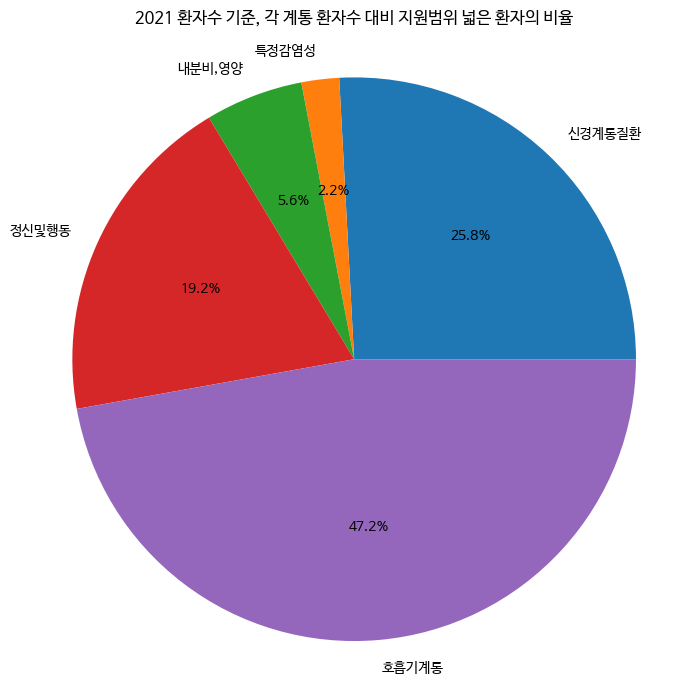

In [150]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_support_extract['지원환자비율'], labels=df_support_extract['항목분류'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('2021 환자수 기준, 각 계통 환자수 대비 지원범위 넓은 환자의 비율\n')
plt.show()

In [151]:
df_support.sort_values('지원환자', ascending=False).query('지원환자비율>0')

,전체환자,항목분류,지원환자,지원환자비율
1,142993,신경계통질환,33337,0.2331
8,43735,호흡기계통,18611,0.4255
4,48268,"내분비,영양",2440,0.0506
5,2177,정신및행동,377,0.1732
2,6009,특정감염성,117,0.0195


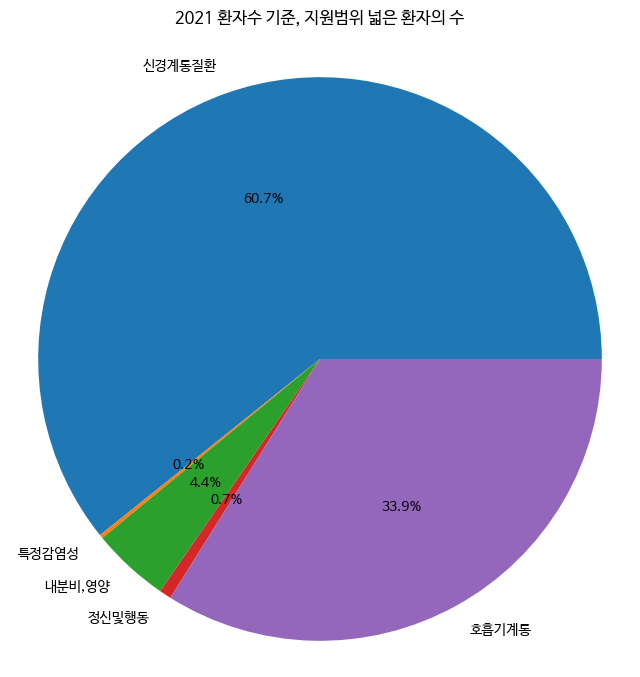

In [152]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_support_extract['지원환자'], labels=df_support_extract['항목분류'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('2021 환자수 기준, 지원범위 넓은 환자의 수\n')
plt.show()

In [153]:
df_disease_name_extract = df_disease_name.loc[(df_disease_name['희귀질환_상병코드'] >= 'G') & (df_disease_name['희귀질환_상병코드'] < 'K')].drop(columns=['_id', 'num','special_calculation' ])
df_disease_name_extract

,질환명,raredisease_title_ENG,희귀질환_상병코드,지원범위,의료비(급여부분),간병비,인공호흡기 및 기침유발기,특수분유 및 저단백즉석밥,옥수수전분
167,DNA복구결손을 수반한 소뇌성 운동실조,Cerebellar ataxia with defective DNA repair,G11.3,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),0,0,0,0
217,X-연관 열성 척수소뇌성 운동실조,X-linked recessive spinocerebellar ataxia,G11.1,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),0,0,0,0
233,가족성 운동신경세포병,Familial motor neuron disease,G12.20,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),0,0,0,0
249,강직인간증후군,Stiff-person[man] syndrome,G25.8,의료비(급여부분),의료비(급여부분),0,0,0,0
263,거짓근긴장증,Pseudomyotonia,G71.1,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),0,0,0,0
...,...,...,...,...,...,...,...,...,...
1192,프리드라이히운동실조(보통염색체열성),Friedreich’s ataxia(autosomal recessive),G11.1,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),0,0,0,0
1204,하다드 증후군,Haddad syndrome,G47.31,의료비(급여부분),의료비(급여부분),0,0,0,0
1210,할러포르덴-스파츠병,Hallervorden-Spatz disease,G23.0,의료비(급여부분),의료비(급여부분),0,0,0,0
1221,헌팅톤무도병,Huntington’s chorea,G10.0,의료비(급여부분),의료비(급여부분),0,0,0,0


In [168]:
df_disease_name_extract['의료비(급여부분)'] = df_disease_name_extract['지원범위'].str.split(', ', expand=True)[0]
df_disease_name_extract['간병비'] = df_disease_name_extract['지원범위'].str.split(', ', expand=True)[0]
df_disease_name_extract['인공호흡기 및 기침유발기'] = df_disease_name_extract['지원범위'].str.split(', ', expand=True)[0]
df_disease_name_extract['보조기기 구입비'] = df_disease_name_extract['지원범위'].str.split(', ', expand=True)[0]

In [158]:
df_disease_extract_final = pd.merge(df_disease_name_extract, df_insurance[['희귀질환_상병코드', '환자수']], on='희귀질환_상병코드', how="left")

In [169]:
df_disease_name_extract

,질환명,raredisease_title_ENG,희귀질환_상병코드,지원범위,의료비(급여부분),간병비,인공호흡기 및 기침유발기,특수분유 및 저단백즉석밥,옥수수전분,보조기기 구입비
167,DNA복구결손을 수반한 소뇌성 운동실조,Cerebellar ataxia with defective DNA repair,G11.3,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),의료비(급여부분),의료비(급여부분),0,0,의료비(급여부분)
217,X-연관 열성 척수소뇌성 운동실조,X-linked recessive spinocerebellar ataxia,G11.1,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),의료비(급여부분),의료비(급여부분),0,0,의료비(급여부분)
233,가족성 운동신경세포병,Familial motor neuron disease,G12.20,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),의료비(급여부분),의료비(급여부분),0,0,의료비(급여부분)
249,강직인간증후군,Stiff-person[man] syndrome,G25.8,의료비(급여부분),의료비(급여부분),의료비(급여부분),의료비(급여부분),0,0,의료비(급여부분)
263,거짓근긴장증,Pseudomyotonia,G71.1,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),의료비(급여부분),의료비(급여부분),0,0,의료비(급여부분)
311,근긴장디스트로피[스타이너트],Dystrophia myotonica[Steinert],G71.1,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),의료비(급여부분),의료비(급여부분),0,0,의료비(급여부분)
313,근긴장장애,Myotonic disorders,G71.1,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),의료비(급여부분),의료비(급여부분),0,0,의료비(급여부분)
314,근디스트로피,Muscular dystrophy,G71.0,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),의료비(급여부분),의료비(급여부분),0,0,의료비(급여부분)
317,근섬유의 특정 형태이상을 동반한 선천성 근디스트로피,Congenital muscular dystrophy with specific mo...,G71.2,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),의료비(급여부분),의료비(급여부분),0,0,의료비(급여부분)
318,근섬유형 불균형,Fibre-type disproportion,G71.2,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),의료비(급여부분),의료비(급여부분),0,0,의료비(급여부분)


In [157]:
df_insurance = df_insurance.rename(columns={'희귀질환 상병코드':'희귀질환_상병코드'})

In [159]:
df_disease_extract_final

,질환명,raredisease_title_ENG,희귀질환_상병코드,지원범위,의료비(급여부분),간병비,인공호흡기 및 기침유발기,특수분유 및 저단백즉석밥,옥수수전분,환자수
0,DNA복구결손을 수반한 소뇌성 운동실조,Cerebellar ataxia with defective DNA repair,G11.3,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),0,0,0,0,34.0
1,X-연관 열성 척수소뇌성 운동실조,X-linked recessive spinocerebellar ataxia,G11.1,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),0,0,0,0,726.0
2,가족성 운동신경세포병,Familial motor neuron disease,G12.20,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),0,0,0,0,NaN
3,강직인간증후군,Stiff-person[man] syndrome,G25.8,의료비(급여부분),의료비(급여부분),0,0,0,0,49251.0
4,거짓근긴장증,Pseudomyotonia,G71.1,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),0,0,0,0,1596.0
...,...,...,...,...,...,...,...,...,...,...
158,프리드라이히운동실조(보통염색체열성),Friedreich’s ataxia(autosomal recessive),G11.1,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),0,0,0,0,726.0
159,하다드 증후군,Haddad syndrome,G47.31,의료비(급여부분),의료비(급여부분),0,0,0,0,127.0
160,할러포르덴-스파츠병,Hallervorden-Spatz disease,G23.0,의료비(급여부분),의료비(급여부분),0,0,0,0,48.0
161,헌팅톤무도병,Huntington’s chorea,G10.0,의료비(급여부분),의료비(급여부분),0,0,0,0,324.0


In [160]:
# def move_data(row):
#     columns = ['의료비(급여부분)', '간병비','인공호흡기 및 기침유발기','보조기기 구입비']
#     for x in columns :
#         # '간병비' 컬럼의 데이터를 가져옴
#         if row[x] == x :
#             row[x] = 1
#         elif row[x] == columns[1] :
#             row[x]=0
#             row[columns[1]]=1
#         elif row[x] == columns[2] :
#             row[x]=0
#             row[columns[2]]=1
#         else :
#             row[x] = 0
#     return row

# # .apply() 메소드를 사용하여 각 행에 대해 move_data 함수 적용
# df_disease_extract_final = df_disease_extract_final.apply(move_data, axis=1)


In [161]:
# df_disease_extract_final = df_disease_extract_final.drop(columns=['raredisease_title_ENG', '지원범위'])

In [162]:
pd.set_option('display.max_rows', None)

In [163]:
df_disease_extract_final

,질환명,raredisease_title_ENG,희귀질환_상병코드,지원범위,의료비(급여부분),간병비,인공호흡기 및 기침유발기,특수분유 및 저단백즉석밥,옥수수전분,환자수
0,DNA복구결손을 수반한 소뇌성 운동실조,Cerebellar ataxia with defective DNA repair,G11.3,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),0,0,0,0,34.0
1,X-연관 열성 척수소뇌성 운동실조,X-linked recessive spinocerebellar ataxia,G11.1,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),0,0,0,0,726.0
2,가족성 운동신경세포병,Familial motor neuron disease,G12.20,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),0,0,0,0,NaN
3,강직인간증후군,Stiff-person[man] syndrome,G25.8,의료비(급여부분),의료비(급여부분),0,0,0,0,49251.0
4,거짓근긴장증,Pseudomyotonia,G71.1,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),0,0,0,0,1596.0
5,근긴장디스트로피[스타이너트],Dystrophia myotonica[Steinert],G71.1,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),0,0,0,0,1596.0
6,근긴장장애,Myotonic disorders,G71.1,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),0,0,0,0,1596.0
7,근디스트로피,Muscular dystrophy,G71.0,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),0,0,0,0,2514.0
8,근섬유의 특정 형태이상을 동반한 선천성 근디스트로피,Congenital muscular dystrophy with specific mo...,G71.2,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),0,0,0,0,440.0
9,근섬유형 불균형,Fibre-type disproportion,G71.2,"의료비(급여부분), 간병비, 인공호흡기 및 기침유발기, 보조기기 구입비",의료비(급여부분),0,0,0,0,440.0


In [164]:
df_disease_extract_final.loc[df_disease_extract_final['간병비']==1]

,질환명,raredisease_title_ENG,희귀질환_상병코드,지원범위,의료비(급여부분),간병비,인공호흡기 및 기침유발기,특수분유 및 저단백즉석밥,옥수수전분,환자수


In [165]:
df_disease_extract_final.loc[df_disease_extract_final['인공호흡기 및 기침유발기']==1]

,질환명,raredisease_title_ENG,희귀질환_상병코드,지원범위,의료비(급여부분),간병비,인공호흡기 및 기침유발기,특수분유 및 저단백즉석밥,옥수수전분,환자수


In [166]:
# df_disease_extract_final.loc[df_disease_extract_final['보조기기 구입비']==1]

KeyError: '보조기기 구입비'

In [ ]:
pd.set_option('display.max_rows', 60)

In [ ]:
df_age_notby_gender_extract

In [ ]:
# 연령군 컬럼 리스트
age_groups = ['1세이하', '1~9세', '10~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70~79세', '80세 이상']

# 결과를 저장할 빈 리스트
results = []

# 각 행(질병)에 대해 반복
for index, row in df_age_notby_gender.iterrows():
    age_counts = row[age_groups]
    # 연령군별 환자 수 추출
    age_counts = row[age_groups]
    # 가장 환자 수가 많은 연령군 찾기
    max_age_group = age_groups[age_counts.argmax()]
    max_age_count=age_counts.max()
    # 결과 저장
    results.append((row['질병코드'], row['질병명'], max_age_group, max_age_count))

# 결과 출력
list_result = []
for result in results:
    list_result.append({'희귀질환_상병코드':result[0],'질환명':result[1], '상위연령군':result[2], '상위연령군환자수':result[3]})
list_result
df_result = pd.DataFrame(list_result)
df_result

In [ ]:
df_result['희귀질환_상병코드'].dtype

In [ ]:
df_result['희귀질환_상병코드'] = df_result['희귀질환_상병코드'].apply(add_comma)

In [ ]:
df_by_code_merge = pd.merge(df_disease_extract_final, df_result, on='질환명', how='left')

In [ ]:
# 상위 연령군을 끌어올 수 있는 데이터 셋 부족
df_by_code_merge

### 계통 별 지원 범위 세부 항목 확인

#### 질환 수로 보기

In [97]:
df_disease_name = pd.read_csv('../../New_csv(데이터전처리 완료된 csv)/helpline_rarediseaseinfo.csv')

In [98]:
df_disease_name = df_disease_name.rename(columns={'KCD_code':'희귀질환_상병코드', 'raredisease_title_KO':'질환명', 'support_text[0]':'지원범위'})
df_disease_name

,_id,num,질환명,raredisease_title_ENG,희귀질환_상병코드,special_calculation,지원범위
0,6630acb312d98428f3f81600,1272,(무한성) 외배엽형성이상,Ectodermal dysplasia (anhidrotic),Q82.4,V900,의료비(급여부분)
1,6630acb412d98428f3f81601,1271,(승모판 협착 또는 폐쇄와 함께) 상행대동맥의 형성저하와 좌심실의 결손발육을 동반하...,"Atresia, or marked hypoplasia of aortic orific...",Q23.4,V147,의료비(급여부분)
2,6630acb512d98428f3f81602,1270,"(외)이도의 선천성 결여, 폐쇄, 협착","Congenital absence, atresia and stricture of a...",Q16.1,V291,의료비(급여부분)
3,6630acb612d98428f3f81603,1269,(이상형태성) 태아알코올증후군,Fetal alcohol syndrome (dysmorphic),Q86.0,V157,의료비(급여부분)
4,6630acb712d98428f3f81604,1268,(하)(상)대정맥의 선천성 협착,Congenital stenosis of vena cava (inferior)(su...,Q26.0,V150,의료비(급여부분)
...,...,...,...,...,...,...,...
1266,6630b2a5164b8b9ab7fba3d7,5,휘파람부는 얼굴,Whistling face,Q87.0,V185,의료비(급여부분)
1267,6630b2a6164b8b9ab7fba3d8,4,흉선성 림프조직무형성,Thymic alymphoplasia,D82.1,V111,의료비(급여부분)
1268,6630b2a7164b8b9ab7fba3d9,3,흉터유사천포창,Cicatricial pemphigoid,L12.1,V212,의료비(급여부분)
1269,6630b2a8164b8b9ab7fba3da,2,히스티딘대사장애,Disorder of histidine metabolism,E70.8,V117,의료비(급여부분)


In [101]:
# '지원범위' 열을 쉼표로 분할하여 새로운 DataFrame 생성합니다. expand=True를 사용하여 분할된 데이터를 별도의 열로 확장합니다.
split_support_details = df_disease_name['지원범위'].str.split(', ', expand=True)
split_support_details[4].unique()

# 결과 DataFrame에 적절한 열 이름을 지정합니다.
split_support_details.columns = ['의료비(급여부분)', '간병비', '인공호흡기 및 기침유발기','보조기기 구입비', '특수분유 및 저단백즉석밥']

# 원래의 df_support_details DataFrame에 결과를 복사합니다.
df_support_details_nerve = split_support_details.copy()

df_support_details_nerve['옥수수전분'] = None

In [102]:
df_support_details_nerve

,의료비(급여부분),간병비,인공호흡기 및 기침유발기,보조기기 구입비,특수분유 및 저단백즉석밥,옥수수전분
0,의료비(급여부분),None,None,None,None,None
1,의료비(급여부분),None,None,None,None,None
2,의료비(급여부분),None,None,None,None,None
3,의료비(급여부분),None,None,None,None,None
4,의료비(급여부분),None,None,None,None,None
...,...,...,...,...,...,...
1266,의료비(급여부분),None,None,None,None,None
1267,의료비(급여부분),None,None,None,None,None
1268,의료비(급여부분),None,None,None,None,None
1269,의료비(급여부분),None,None,None,None,None


In [103]:
df_support_details_nerve['간병비'].unique()

array([None, '간병비', '특수분유 및 저단백즉석밥', '인공호흡기 및 기침유발기'], dtype=object)

In [104]:
df_factcheck = pd.concat([df_disease_name, df_support_details_nerve], axis=1)

In [105]:
df_factcheck['특수분유 및 저단백즉석밥'].unique()

array([None, '옥수수전분'], dtype=object)

In [106]:
def move_data(row):
    columns = ['의료비(급여부분)', '간병비', '인공호흡기 및 기침유발기','보조기기 구입비', '특수분유 및 저단백즉석밥', '옥수수전분']
    for col in columns:
        # 컬럼의 데이터가 해당 컬럼의 이름과 같지 않으면 0으로 설정
        if row[col] != col:
            row[row[col]]=row[col]
            row[col] = 0
        else :
            row[col]=1
    return row

# .apply() 메소드를 사용하여 각 행에 대해 move_data 함수 적용
df_support_details_nerve_support = df_factcheck.apply(move_data, axis=1)

# 수정된 데이터프레임에서 필요한 컬럼을 다른 데이터프레임에 복사
columns = ['의료비(급여부분)', '간병비', '인공호흡기 및 기침유발기','보조기기 구입비', '특수분유 및 저단백즉석밥', '옥수수전분']
for col in columns:
    df_factcheck[col] = df_support_details_nerve_support[col]


In [109]:
len(df_factcheck.loc[df_factcheck['옥수수전분']==1])

9

In [112]:
df_factcheck[:5]

,_id,num,질환명,raredisease_title_ENG,희귀질환_상병코드,special_calculation,지원범위,의료비(급여부분),간병비,인공호흡기 및 기침유발기,보조기기 구입비,특수분유 및 저단백즉석밥,옥수수전분
0,6630acb312d98428f3f81600,1272,(무한성) 외배엽형성이상,Ectodermal dysplasia (anhidrotic),Q82.4,V900,의료비(급여부분),1,0,0,0,0,0
1,6630acb412d98428f3f81601,1271,(승모판 협착 또는 폐쇄와 함께) 상행대동맥의 형성저하와 좌심실의 결손발육을 동반하...,"Atresia, or marked hypoplasia of aortic orific...",Q23.4,V147,의료비(급여부분),1,0,0,0,0,0
2,6630acb512d98428f3f81602,1270,"(외)이도의 선천성 결여, 폐쇄, 협착","Congenital absence, atresia and stricture of a...",Q16.1,V291,의료비(급여부분),1,0,0,0,0,0
3,6630acb612d98428f3f81603,1269,(이상형태성) 태아알코올증후군,Fetal alcohol syndrome (dysmorphic),Q86.0,V157,의료비(급여부분),1,0,0,0,0,0
4,6630acb712d98428f3f81604,1268,(하)(상)대정맥의 선천성 협착,Congenital stenosis of vena cava (inferior)(su...,Q26.0,V150,의료비(급여부분),1,0,0,0,0,0


In [113]:
df_factcheck['항목분류'] = df_factcheck['희귀질환_상병코드'].apply(codes)

In [117]:
df_factcheck_nerve = df_factcheck.query('항목분류=="신경계통질환"')

In [141]:
cate_list = df_factcheck['항목분류'].dropna().unique().tolist()
cate_list

['선천기형변형',
 '근육골격계통',
 '내분비,영양',
 '혈액조혈기관',
 '신경계통질환',
 '소화기계통',
 '신생물',
 '비뇨생식',
 '순환기계통',
 '피부및조직',
 '눈및부속기관',
 '정신및행동',
 '특정감염성',
 '출생전후기',
 '호흡기계통']

In [145]:
import pandas as pd

# 예시 cate_list, 이 리스트는 실제 사용하는 항목 분류 리스트로 대체해야 합니다.
cate_list = ['선천기형변형', '근육골격계통', '내분비,영양', '혈액조혈기관', '신경계통질환', '소화기계통', '신생물', '비뇨생식', '순환기계통', '피부및조직', '눈및부속기관', '정신및행동', '특정감염성', '출생전후기', '호흡기계통']

# 데이터를 저장할 빈 리스트 초기화
data = []

for x in cate_list:
    # 각 항목별로 조건에 맞는 행의 개수를 계산
    의료비_급여부분_count = len(df_factcheck[(df_factcheck['항목분류'] == x) & (df_factcheck['의료비(급여부분)'] == 1)])
    간병비_count = len(df_factcheck[(df_factcheck['항목분류'] == x) & (df_factcheck['간병비'] == 1)])
    인공호흡기_기침유발기_count = len(df_factcheck[(df_factcheck['항목분류'] == x) & (df_factcheck['인공호흡기 및 기침유발기'] == 1)])
    보조기기_구입비_count = len(df_factcheck[(df_factcheck['항목분류'] == x) & (df_factcheck['보조기기 구입비'] == 1)])
    특수분유_저단백즉석밥_count = len(df_factcheck[(df_factcheck['항목분류'] == x) & (df_factcheck['특수분유 및 저단백즉석밥'] == 1)])
    옥수수전분_count = len(df_factcheck[(df_factcheck['항목분류'] == x) & (df_factcheck['옥수수전분'] == 1)])
    
    # 계산된 개수를 리스트에 추가
    data.append({
        '항목분류': x,
        '의료비(급여부분)': 의료비_급여부분_count,
        '간병비': 간병비_count,
        '인공호흡기 및 기침유발기': 인공호흡기_기침유발기_count,
        '보조기기 구입비': 보조기기_구입비_count,
        '특수분유 및 저단백즉석밥': 특수분유_저단백즉석밥_count,
        '옥수수전분': 옥수수전분_count
    })

# 모든 데이터를 포함하는 새로운 데이터프레임 생성
df_support_scale = pd.DataFrame(data)

df_support_scale


,항목분류,의료비(급여부분),간병비,인공호흡기 및 기침유발기,보조기기 구입비,특수분유 및 저단백즉석밥,옥수수전분
0,선천기형변형,298,0,0,0,0,0
1,근육골격계통,63,0,0,0,0,0
2,"내분비,영양",191,27,25,25,28,9
3,혈액조혈기관,153,0,0,0,0,0
4,신경계통질환,124,71,79,71,0,0
5,소화기계통,13,0,0,0,0,0
6,신생물,2,0,0,0,0,0
7,비뇨생식,17,0,0,0,0,0
8,순환기계통,20,0,0,0,0,0
9,피부및조직,8,0,0,0,0,0


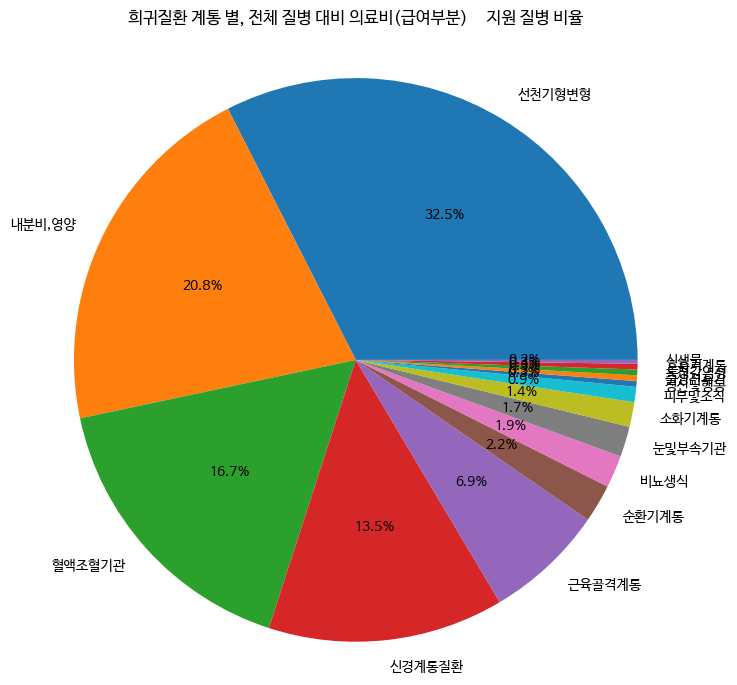

In [249]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_support_scale.sort_values('의료비(급여부분)', ascending=False)['의료비(급여부분)'], labels=df_support_scale.sort_values('의료비(급여부분)', ascending=False)['항목분류'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('희귀질환 계통 별, 전체 질병 대비 의료비(급여부분)	 지원 질병 비율\n')
plt.show()

In [224]:
df_support_scale_nursing_fee = pd.DataFrame()

In [225]:
df_support_scale_nursing_fee= df_support_scale[['항목분류', '간병비']]

In [228]:
df_support_scale_nursing_fee.query('간병비>0')

,항목분류,간병비
2,"내분비,영양",27
4,신경계통질환,71
11,정신및행동,1
12,특정감염성,1


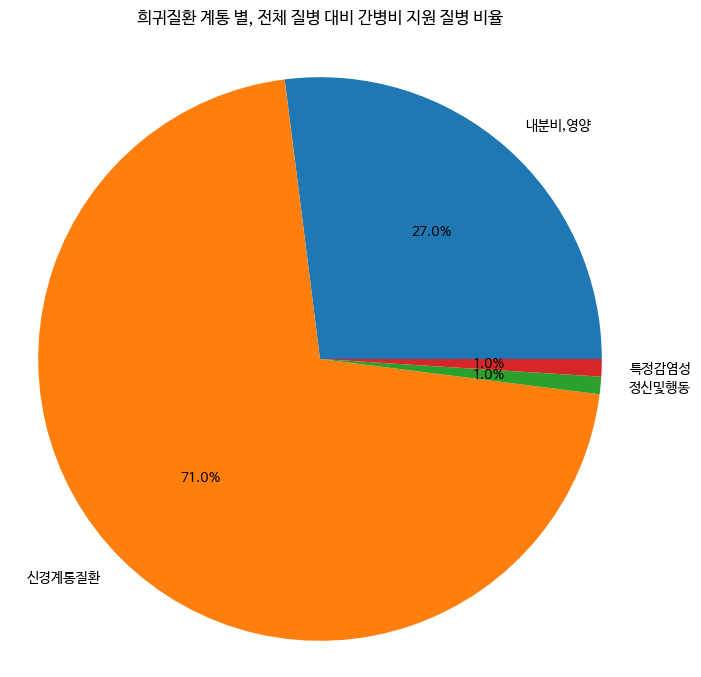

In [245]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_support_scale.loc[df_support_scale['간병비']>0, '간병비'], labels=df_support_scale.loc[df_support_scale['간병비']>0 , '항목분류'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('희귀질환 계통 별, 전체 질병 대비 간병비 지원 질병 비율\n')
plt.show()

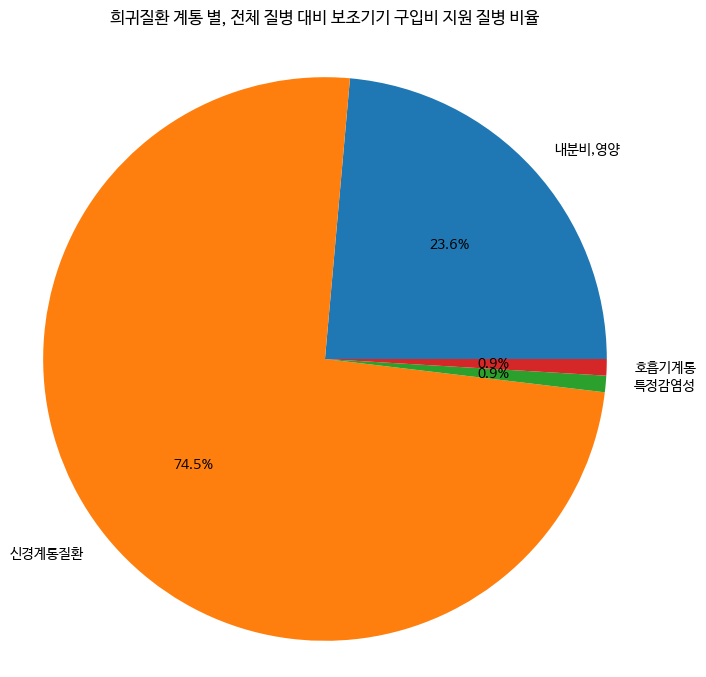

In [238]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_support_scale.loc[df_support_scale['인공호흡기 및 기침유발기']>0, '인공호흡기 및 기침유발기'], labels=df_support_scale.loc[df_support_scale['인공호흡기 및 기침유발기']>0, '항목분류'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('희귀질환 계통 별, 전체 질병 대비 보조기기 구입비 지원 질병 비율\n')
plt.show()

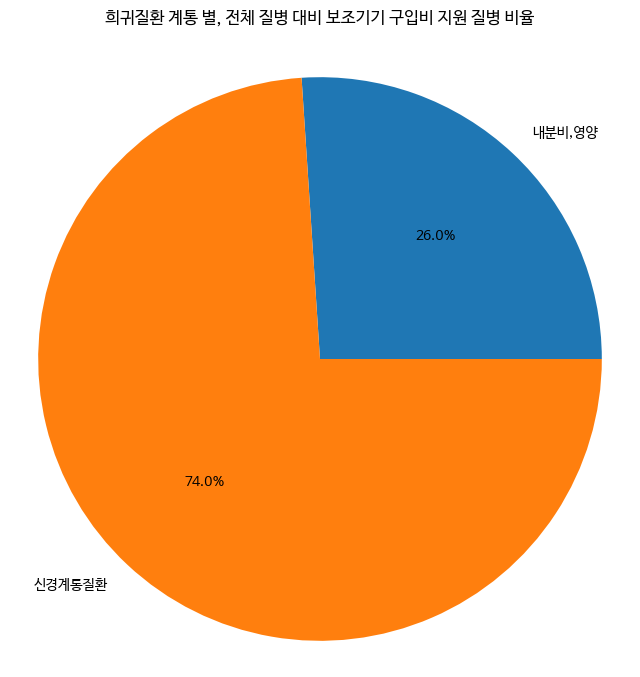

In [237]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_support_scale.loc[df_support_scale['보조기기 구입비']>0, '보조기기 구입비'], labels=df_support_scale.loc[df_support_scale['보조기기 구입비']>0, '항목분류'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('희귀질환 계통 별, 전체 질병 대비 보조기기 구입비 지원 질병 비율\n')
plt.show()

In [152]:
df_ratio_of_support_scale

,항목분류,의료비(급여부분),간병비,인공호흡기 및 기침유발기,보조기기 구입비,특수분유 및 저단백즉석밥,옥수수전분
0,선천기형변형,0.32,0.00,0.00,0.00,0.0,0.0
1,근육골격계통,0.07,0.00,0.00,0.00,0.0,0.0
2,"내분비,영양",0.21,0.27,0.24,0.26,1.0,1.0
3,혈액조혈기관,0.17,0.00,0.00,0.00,0.0,0.0
4,신경계통질환,0.14,0.71,0.75,0.74,0.0,0.0
5,소화기계통,0.01,0.00,0.00,0.00,0.0,0.0
6,신생물,0.00,0.00,0.00,0.00,0.0,0.0
7,비뇨생식,0.02,0.00,0.00,0.00,0.0,0.0
8,순환기계통,0.02,0.00,0.00,0.00,0.0,0.0
9,피부및조직,0.01,0.00,0.00,0.00,0.0,0.0


#### 환자 수로 보기

In [187]:
df_insurance = df_insurance.rename(columns={'희귀질환 상병코드':'희귀질환_상병코드'})

In [188]:
df_support_scale_by_pop = pd.merge(df_factcheck, df_insurance, on='희귀질환_상병코드', how='left')

In [189]:
df_support_scale_by_pop.columns

Index(['_id', 'num', '질환명', 'raredisease_title_ENG', '희귀질환_상병코드',
       'special_calculation', '지원범위', '의료비(급여부분)', '간병비', '인공호흡기 및 기침유발기',
       '보조기기 구입비', '특수분유 및 저단백즉석밥', '옥수수전분', '항목분류', '환자수', '명세서 청구건수',
       '입내원일수', '보험자부담금', '요양급여비용총액'],
      dtype='object')

In [190]:
df_support_scale_by_pop = df_support_scale_by_pop[['질환명', '항목분류', '희귀질환_상병코드', '의료비(급여부분)', '간병비', '인공호흡기 및 기침유발기',
       '보조기기 구입비', '특수분유 및 저단백즉석밥', '옥수수전분', '환자수']]

In [191]:
df_support_scale_by_pop[(df_support_scale_by_pop['항목분류']=='선천기형변형') & (df_support_scale_by_pop['의료비(급여부분)']==1)]

,질환명,항목분류,희귀질환_상병코드,의료비(급여부분),간병비,인공호흡기 및 기침유발기,보조기기 구입비,특수분유 및 저단백즉석밥,옥수수전분,환자수
0,(무한성) 외배엽형성이상,선천기형변형,Q82.4,1,0,0,0,0,0,41.0
1,(승모판 협착 또는 폐쇄와 함께) 상행대동맥의 형성저하와 좌심실의 결손발육을 동반하...,선천기형변형,Q23.4,1,0,0,0,0,0,136.0
2,"(외)이도의 선천성 결여, 폐쇄, 협착",선천기형변형,Q16.1,1,0,0,0,0,0,879.0
3,(이상형태성) 태아알코올증후군,선천기형변형,Q86.0,1,0,0,0,0,0,1.0
4,(하)(상)대정맥의 선천성 협착,선천기형변형,Q26.0,1,0,0,0,0,0,8.0
...,...,...,...,...,...,...,...,...,...,...
1261,횡격막결여,선천기형변형,Q79.1,1,0,0,0,0,0,321.0
1262,횡격막의 기타 선천기형,선천기형변형,Q79.1,1,0,0,0,0,0,321.0
1263,횡격막의 선천기형 NOS,선천기형변형,Q79.1,1,0,0,0,0,0,321.0
1266,휘파람부는 얼굴,선천기형변형,Q87.0,1,0,0,0,0,0,634.0


In [192]:
import pandas as pd

# 예시 cate_list, 이 리스트는 실제 사용하는 항목 분류 리스트로 대체해야 합니다.
cate_list = ['선천기형변형', '근육골격계통', '내분비,영양', '혈액조혈기관', '신경계통질환', '소화기계통', '신생물', '비뇨생식', '순환기계통', '피부및조직', '눈및부속기관', '정신및행동', '특정감염성', '출생전후기', '호흡기계통']

# 데이터를 저장할 빈 리스트 초기화
data = []

for x in cate_list:
    # 각 항목별로 조건에 맞는 행의 개수를 계산
    의료비_급여부분_환자수 = df_support_scale_by_pop[(df_support_scale_by_pop['항목분류'] == x) & (df_support_scale_by_pop['의료비(급여부분)'] == 1)]['환자수'].sum()
    간병비_환자수 = df_support_scale_by_pop[(df_support_scale_by_pop['항목분류'] == x) & (df_support_scale_by_pop['간병비'] == 1)]['환자수'].sum()
    인공호흡기_기침유발기_환자수 = df_support_scale_by_pop[(df_support_scale_by_pop['항목분류'] == x) & (df_support_scale_by_pop['인공호흡기 및 기침유발기'] == 1)]['환자수'].sum()
    보조기기_구입비_환자수 = df_support_scale_by_pop[(df_support_scale_by_pop['항목분류'] == x) & (df_support_scale_by_pop['보조기기 구입비'] == 1)]['환자수'].sum()
    특수분유_저단백즉석밥_환자수 = df_support_scale_by_pop[(df_support_scale_by_pop['항목분류'] == x) & (df_support_scale_by_pop['특수분유 및 저단백즉석밥'] == 1)]['환자수'].sum()
    옥수수전분_환자수 = df_support_scale_by_pop[(df_support_scale_by_pop['항목분류'] == x) & (df_support_scale_by_pop['옥수수전분'] == 1)]['환자수'].sum()
    
    # 계산된 개수를 리스트에 추가
    data.append({
        '항목분류': x,
        '의료비(급여부분)': 의료비_급여부분_환자수,
        '간병비': 간병비_환자수,
        '인공호흡기 및 기침유발기': 인공호흡기_기침유발기_환자수,
        '보조기기 구입비': 보조기기_구입비_환자수,
        '특수분유 및 저단백즉석밥': 특수분유_저단백즉석밥_환자수,
        '옥수수전분': 옥수수전분_환자수
    })

# 모든 데이터를 포함하는 새로운 데이터프레임 생성
df_support_scale_by_pop = pd.DataFrame(data)

df_support_scale_by_pop

,항목분류,의료비(급여부분),간병비,인공호흡기 및 기침유발기,보조기기 구입비,특수분유 및 저단백즉석밥,옥수수전분
0,선천기형변형,192033.0,0.0,0.0,0.0,0.0,0.0
1,근육골격계통,427002.0,0.0,0.0,0.0,0.0,0.0
2,"내분비,영양",135591.0,6014.0,5093.0,5093.0,3549.0,2835.0
3,혈액조혈기관,74312.0,0.0,0.0,0.0,0.0,0.0
4,신경계통질환,219378.0,78249.0,97840.0,78249.0,0.0,0.0
5,소화기계통,57286.0,0.0,0.0,0.0,0.0,0.0
6,신생물,273917.0,0.0,0.0,0.0,0.0,0.0
7,비뇨생식,15187.0,0.0,0.0,0.0,0.0,0.0
8,순환기계통,66716.0,0.0,0.0,0.0,0.0,0.0
9,피부및조직,4419.0,0.0,0.0,0.0,0.0,0.0


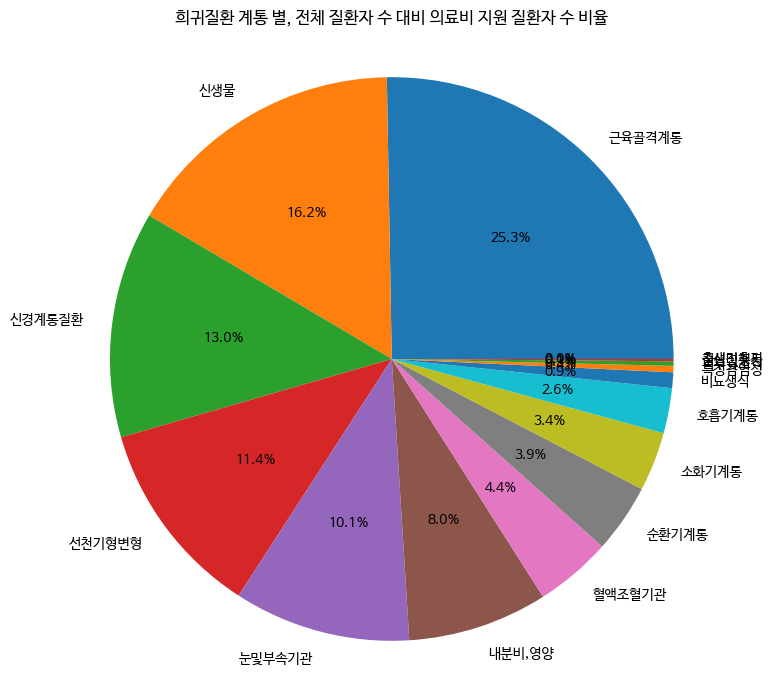

In [200]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_support_scale_by_pop.sort_values('의료비(급여부분)', ascending=False)['의료비(급여부분)'], labels=df_support_scale_by_pop.sort_values('의료비(급여부분)', ascending=False)['항목분류'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('희귀질환 계통 별, 전체 질환자 수 대비 의료비 지원 질환자 수 비율\n')
plt.show()

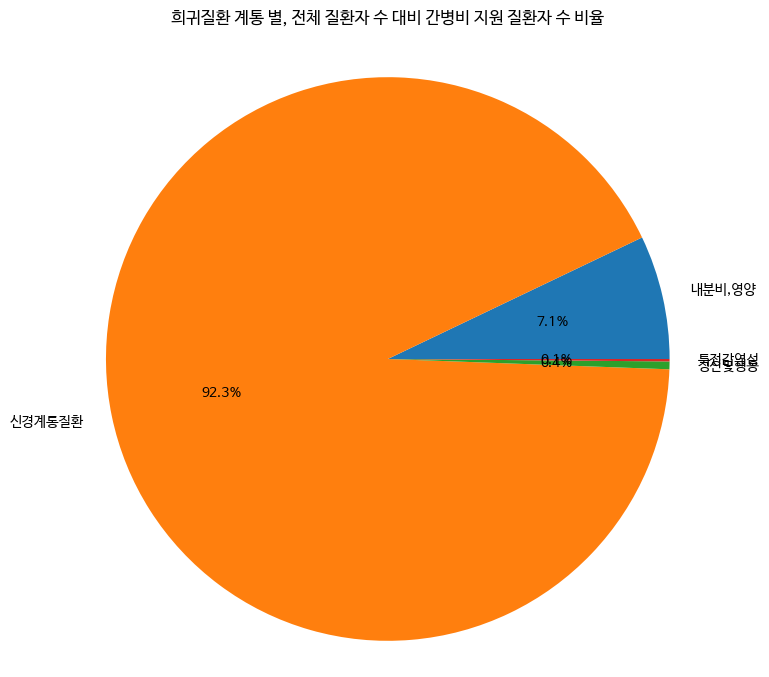

In [246]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_support_scale_by_pop.loc[df_support_scale_by_pop['간병비']>0, '간병비'], labels=df_support_scale_by_pop.loc[df_support_scale_by_pop['간병비']>0 , '항목분류'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('희귀질환 계통 별, 전체 질환자 수 대비 간병비 지원 질환자 수 비율\n')
plt.show()


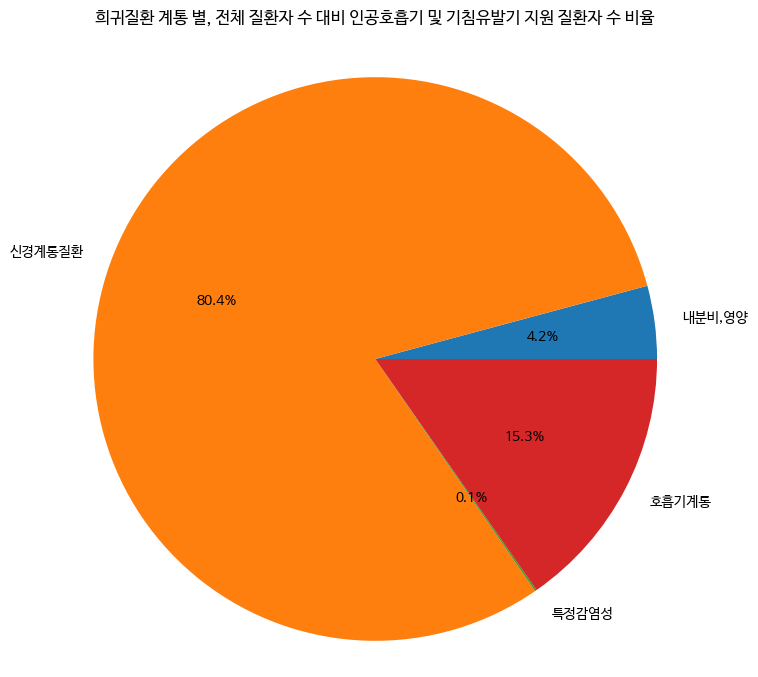

In [247]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_support_scale_by_pop.loc[df_support_scale_by_pop['인공호흡기 및 기침유발기']>0, '인공호흡기 및 기침유발기'], labels=df_support_scale_by_pop.loc[df_support_scale['인공호흡기 및 기침유발기']>0 , '항목분류'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('희귀질환 계통 별, 전체 질환자 수 대비 인공호흡기 및 기침유발기 지원 질환자 수 비율\n')
plt.show()

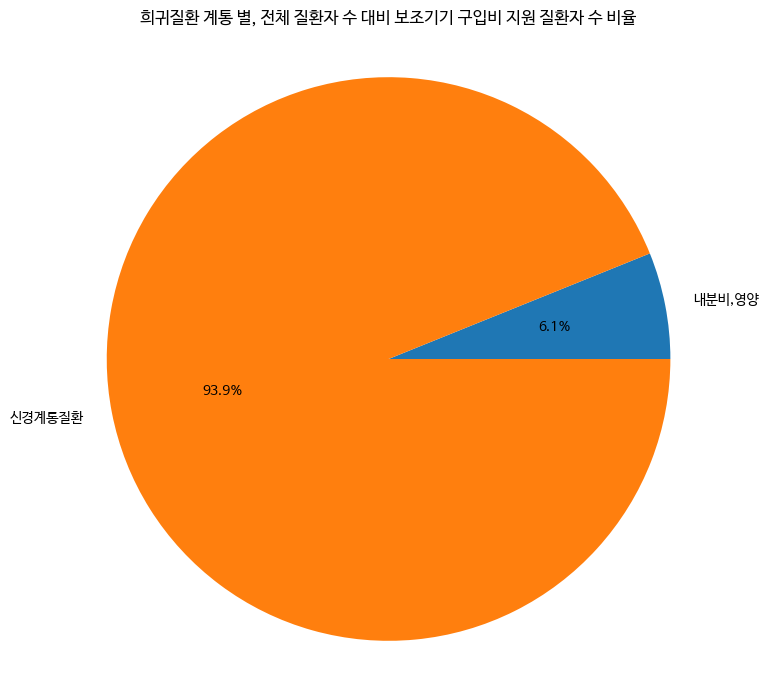

In [248]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_support_scale_by_pop.loc[df_support_scale_by_pop['보조기기 구입비']>0, '보조기기 구입비'], labels=df_support_scale_by_pop.loc[df_support_scale_by_pop['보조기기 구입비']>0 , '항목분류'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('희귀질환 계통 별, 전체 질환자 수 대비 보조기기 구입비 지원 질환자 수 비율\n')
plt.show()

## 분석 내용 기반_연령군별로 묶어보기

In [124]:
df_age = pd.read_csv('../../New_csv(데이터전처리 완료된 csv)/2021_질병분류코드별_발생자수.csv')
df_age_notby_gender = df_age.iloc[1:].query('성별=="계"').drop(columns=['성별', '발생자수'])

In [125]:
df_age_notby_gender['질병코드']

1       D61.3
4       D61.9
7       D68.6
10      D86.0
13      E27.4
16      F01.1
19      G11.2
22      G11.9
25      G12.2
28      G23.1
31        G35
34      G36.0
37      G41.9
40      G47.4
43      G61.0
46      G61.8
49      G70.0
52      G90.5
55      G95.0
58      H18.6
61     H35.51
64      I27.0
67      I42.0
70      I42.1
73     I42.20
76      I67.5
79      I73.1
82      J84.1
85      K50.0
88      K50.1
91      K50.8
94      K74.3
97      K75.4
100     L12.0
103     M06.1
106     M08.0
109     M32.1
112     M33.1
115     M34.0
118     M35.0
121     M35.0
124     M35.1
127     M35.2
130     M35.3
133     Q05.9
136     Q17.2
139     Q21.3
142     Q23.1
145     Q24.5
148     Q85.0
151     Q85.0
154       NaN
Name: 질병코드, dtype: object

In [126]:
df_age_notby_gender['항목분류'] = df_age_notby_gender['질병코드'].apply(codes)

In [127]:
df_age_notby_gender_extract = df_age_notby_gender.query('항목분류=="신경계통질환"').T

In [128]:
df_age_notby_gender_extract.loc['질병코드'].tolist()

['G11.2',
 'G11.9',
 'G12.2',
 'G23.1',
 'G35',
 'G36.0',
 'G41.9',
 'G47.4',
 'G61.0',
 'G61.8',
 'G70.0',
 'G90.5',
 'G95.0']

In [129]:
df_age_notby_gender_extract.columns =  df_age_notby_gender_extract.loc['질병코드']

In [130]:
df_age_notby_gender_extract[:2]

질병코드,G11.2,G11.9,G12.2,G23.1,G35,G36.0,G41.9,G47.4,G61.0,G61.8,G70.0,G90.5,G95.0
질병코드,G11.2,G11.9,G12.2,G23.1,G35,G36.0,G41.9,G47.4,G61.0,G61.8,G70.0,G90.5,G95.0
질병명,만기발병 소뇌성 운동실조(발병은 보통 20세 이후),상세불명의 유전성 운동실조,"운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)",진행성 핵상안근마비 [스틸-리차드슨-올스제위스키],다발경화증,시신경척수염[데빅병],상세불명의 뇌전증지속상태,발작수면 및 허탈발작,길랭-바레증후군,만성 염증성 탈수초성 다발신경병증,중증근무력증,복합부위통증증후군 I형,척수공동증 및 연수공동증


### 분석결과(발생자 수 순)
- G41.9	: 상세불명의 뇌전증지속상태
  + 80세 이상(247) > 60-69세(223) > 70-79세(219) > 50-59세(163)  > 40-49세(95)

- G70.0	: 중증근무력증
  + 60-69세(207) > 50-59세(204) > 40-49세(166) > 70-79세(122) > 30-39세(86)
    
- G12.2	: 운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)
  + 60-69세(287) > 70-79세(254) > 50-59세(200)  > 40-49세(68)	> 80세 이상(54)

- G61.0	: 길랭-바레증후군
  + 60-69세(213) > 50-59세(151) > 70-79세(131) > 80세 이상(77)  > 40-49세(68)   

- G47.4	: 발작수면 및 허탈발작
  + 20-29세(278) > 10-19세(129) > 30-39세(110) > 40-49세(78)  > 50-59세(23)

- G90.5	: 복합부위통증증후군 I형
  + 50-59세(119) > 60-69세(110) > 40-49세(74) > 70-79세(54) > 20-29세(42)
        
- G11.2 : 만기발병 소뇌성 운동실조(발병은 보통 20세 이후)
  + 60-69세(168) > 50-59세(126) > 70-79세(84) > 40-49세(37)	> 80세 이상(14)

- G95.0	: 척수공동증 및 연수공동증
  + 30-39세(66) > 40-49세(61) > 20-29세(59) > 50-59세(47) > 60-69세(39)  

- G36.0	: 시신경척수염(데빅병)
  + 40-49세(70) > 50-59세(69) > 60-69세(57) > 30-39세(34)  > 20-29세(30)

- G11.9 : 상세불명의 유전성 운동실조
  + 50-59세(79) > 60-69세(70) >  70-79세(41) > 40-49세(32)	> 30-39세(21)

- G61.8	: 만성 염증성 탈수초성 다발신경병증
  + 60-69세(79) > 50-59세(47) > 70-79세(42) > 80세 이상(29)  > 40-49세(25)
  
- G23.1	: 진행성 핵상안근마비 (스틸-리차드슨-올스제위스키)
  + 70-79세(106) > 60-69세(78) > 80세 이상(46) > 50-59세(12)  > 0

- G35	: 다발경화증
  + 20-29세(71) > 30-39세(56) > 40-49세(49) > 50-59세(26)  > 10-19세(16)
 
### 결론
- 신경계통질환은 (2021년도에) 전체적으로 60-69세:1549, 50-59세:1266, 70-79세:1095 순으로 '발병'됨.
- 신경계통 질환이란 뇌나 척수 등 중추신경계 또는 말초신경계에 발생하는 질병을 의미하며 크게 두 가지로 분류됩니다. 첫 번째는 뇌졸중과 같은 뇌혈관 질환이고, 두 번째는 치매와 같은 퇴행성뇌질환입니다.
-> 4대 퇴행성 희귀질환: G20(파킨슨)+(파킨슨 파생 치매 F02.3), G30(알츠하이머)+(파킨슨 파생 치매 F00), 근위축성 측삭경화증 G12.21, 중증 근무력증 G70.0



In [131]:
df_age_notby_gender_extract_final = df_age_notby_gender_extract.iloc[2:12]

In [132]:
df_age_notby_gender_extract_final = df_age_notby_gender_extract_final.astype(int)

In [133]:
# df_age_notby_gender_extract_final의 각 열에 대한 합계를 계산
column_sums = df_age_notby_gender_extract_final.sum()

# 계산한 합계에 기반하여 열 이름을 정렬
sorted_columns = column_sums.sort_values(ascending=False).index

# 정렬된 열 이름에 따라 DataFrame의 열을 재배치
df_sorted = df_age_notby_gender_extract_final[sorted_columns]


In [134]:
df_sorted

질병코드,G41.9,G70.0,G12.2,G61.0,G47.4,G90.5,G11.2,G95.0,G36.0,G11.9,G61.8,G23.1,G35
1세이하,12,0,0,0,0,0,0,22,0,0,0,0,0
1~9세,51,5,0,5,0,0,0,22,2,3,2,0,1
10~19세,21,31,2,19,129,7,0,16,2,4,1,0,16
20~29세,55,58,5,34,278,42,2,59,30,8,8,0,71
30~39세,51,86,19,56,110,37,9,66,34,21,11,0,56
40~49세,95,166,68,68,78,74,37,61,70,32,25,0,49
50~59세,163,204,200,151,23,119,126,47,69,79,47,12,26
60~69세,223,207,287,213,11,110,168,39,57,70,79,78,7
70~79세,219,122,254,131,7,54,84,9,22,41,42,106,4
80세 이상,247,57,54,77,1,30,14,7,5,11,29,46,1


In [135]:
df_sorted.columns.tolist()[0]

'G41.9'

In [136]:
df_sorted['all'] = df_sorted.sum(axis=1)

/tmp/ipykernel_59338/4085350327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted['all'] = df_sorted.sum(axis=1)


In [137]:
df_sorted.sort_values('all', ascending=False)

질병코드,G41.9,G70.0,G12.2,G61.0,G47.4,G90.5,G11.2,G95.0,G36.0,G11.9,G61.8,G23.1,G35,all
60~69세,223,207,287,213,11,110,168,39,57,70,79,78,7,1549
50~59세,163,204,200,151,23,119,126,47,69,79,47,12,26,1266
70~79세,219,122,254,131,7,54,84,9,22,41,42,106,4,1095
40~49세,95,166,68,68,78,74,37,61,70,32,25,0,49,823
20~29세,55,58,5,34,278,42,2,59,30,8,8,0,71,650
80세 이상,247,57,54,77,1,30,14,7,5,11,29,46,1,579
30~39세,51,86,19,56,110,37,9,66,34,21,11,0,56,556
10~19세,21,31,2,19,129,7,0,16,2,4,1,0,16,248
1~9세,51,5,0,5,0,0,0,22,2,3,2,0,1,91
1세이하,12,0,0,0,0,0,0,22,0,0,0,0,0,34


### 내분비영양계통

In [142]:
df_age_notby_gender_extract = df_age_notby_gender.query('항목분류=="내분비,영양"').T

In [143]:
df_age_notby_gender_extract

,13
질병코드,E27.4
질병명,부신피질부전 NOS
1세이하,0
1~9세,2
10~19세,4
20~29세,7
30~39세,13
40~49세,36
50~59세,65
60~69세,142
